<a href="https://colab.research.google.com/github/YHFTF/AI_lab/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.8 MB/s eta 0:00:00


Waveform shape: torch.Size([1, 177152])
Sample rate: 44100


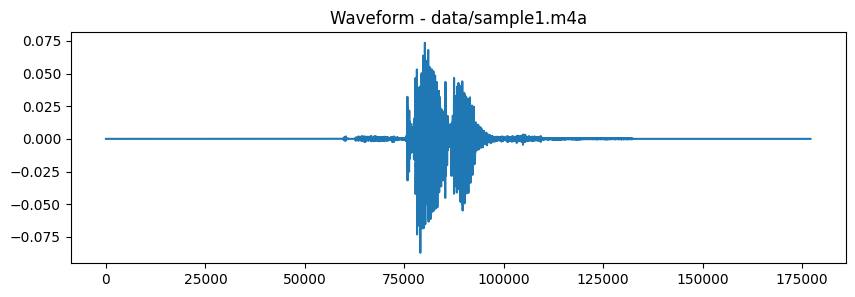

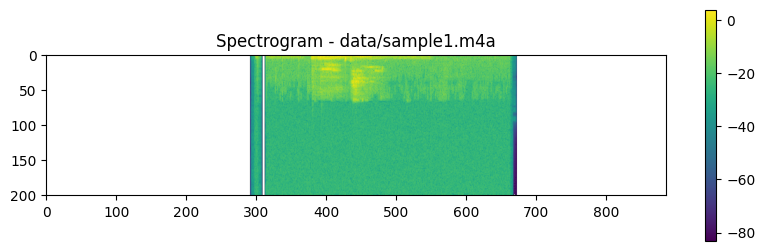

Original: torch.Size([1, 177152]) 44100
Down: torch.Size([1, 32137]) 8000
Up: torch.Size([1, 177156]) 44100
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100


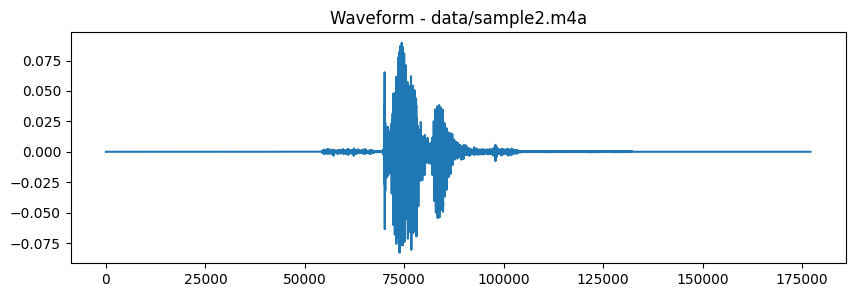

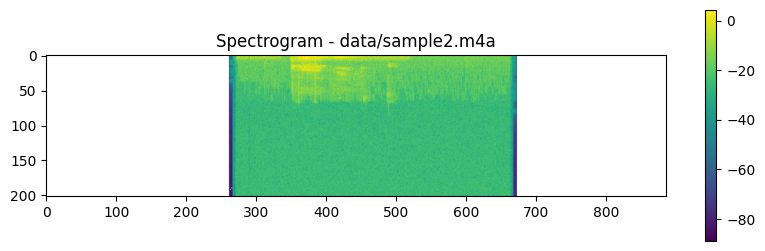

Original: torch.Size([1, 177152]) 44100
Down: torch.Size([1, 32137]) 8000
Up: torch.Size([1, 177156]) 44100
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100


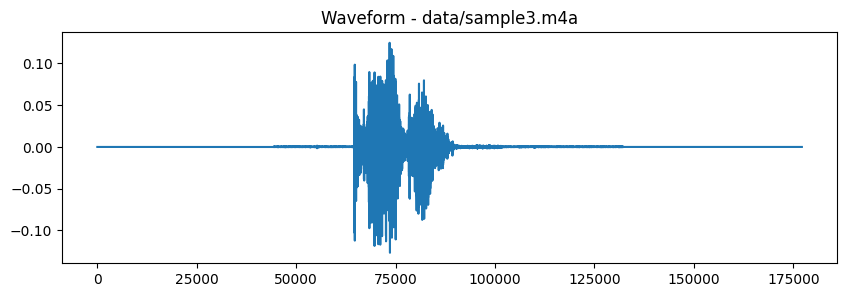

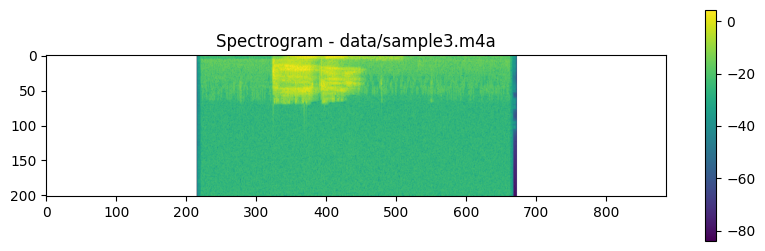

Original: torch.Size([1, 177152]) 44100
Down: torch.Size([1, 32137]) 8000
Up: torch.Size([1, 177156]) 44100
Waveform shape: torch.Size([1, 177152])
Sample rate: 44100


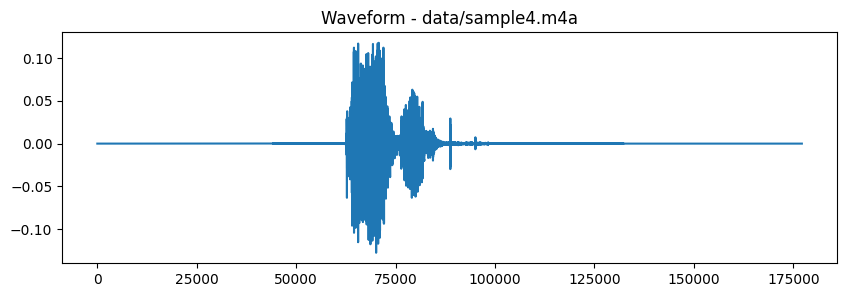

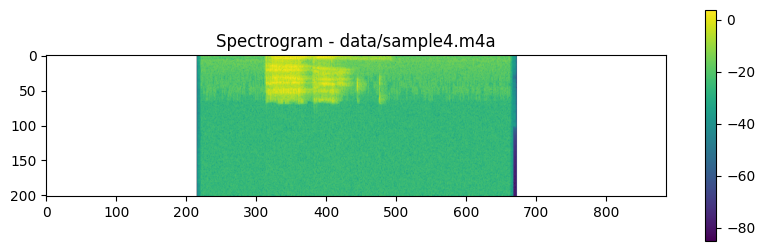

Original: torch.Size([1, 177152]) 44100
Down: torch.Size([1, 32137]) 8000
Up: torch.Size([1, 177156]) 44100


In [14]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.transforms as T

outdir = "output"
os.makedirs(outdir, exist_ok=True)
files = ["data/sample1.m4a", "data/sample2.m4a", "data/sample3.m4a", "data/sample4.m4a"]

for fname in files:
    waveform, sample_rate = torchaudio.load(fname)
    base = os.path.splitext(os.path.basename(fname))[0]
    print("Waveform shape:", waveform.shape)
    print("Sample rate:", sample_rate)

    #파형
    plt.figure(figsize=(10, 3))
    plt.plot(waveform.t().numpy())
    plt.title(f"Waveform - {fname}")
    plt.show()

    #스펙토그램
    spectrogram = torchaudio.transforms.Spectrogram()(waveform)
    plt.figure(figsize=(10, 3))
    plt.imshow(spectrogram.log2()[0,:,:].numpy(), cmap='viridis')
    plt.title(f"Spectrogram - {fname}")
    plt.colorbar()
    plt.show()

    #다운,업 샘플링 후 저장
    new_sample_rate = 8000
    downsample = T.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
    upsample = T.Resample(orig_freq=new_sample_rate, new_freq=sample_rate)

    waveform_down = downsample(waveform)
    waveform_up = upsample(waveform_down)

    print("Original:", waveform.shape, sample_rate)
    print("Down:", waveform_down.shape, new_sample_rate)
    print("Up:", waveform_up.shape, sample_rate)

    down_path = os.path.join(outdir, f"{base}_down.wav")
    up_path   = os.path.join(outdir, f"{base}_up.wav")

    torchaudio.save(down_path, waveform_down, new_sample_rate)
    torchaudio.save(up_path, waveform_up, sample_rate)